In [16]:
import train
import numpy as np
import api.capital_features_api as cf
import pandas as pd
import mplfinance as mpf
from datetime import datetime

In [2]:
train_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=7)
validation_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=26988)
train_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144587)
validation_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144588)

In [3]:
Y_up_train = train_up_data['upSignals']
Y_up_val = validation_up_data['upSignals']
Y_down_train = train_down_data['downSignals']
Y_down_val = validation_down_data['downSignals']

In [4]:
train_up_dataset, validation_up_dataset, scaler_up = train.to_dataset(train_up_data, validation_up_data, Y_up_train, Y_up_val)
train_down_dataset, validation_down_dataset, scaler_down = train.to_dataset(train_down_data, validation_down_data, Y_down_train, Y_down_val)
weights_up = train.to_weights(Y_up_train)
weights_down = train.to_weights(Y_down_train)

In [5]:
model_up, callbacks_up = train.get_model(5, 40)
model_down, callbacks_down = train.get_model(5, 40)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            86528     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 batch_normalization (BatchN  (None, 5, 128)           512       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [6]:
his_up = model_up.fit(train_up_dataset, epochs=100, validation_data=validation_up_dataset, verbose=1, callbacks=callbacks_up,
                   class_weight=weights_up)

Epoch 1/100
788/788 [==============================] - 24s 24ms/step - loss: 0.7596 - accuracy: 0.6185 - precision: 0.6172 - recall: 0.6242 - max_acc: 0.7286 - val_loss: 1.0856 - val_accuracy: 0.4838 - val_precision: 0.4493 - val_recall: 0.1435 - val_max_acc: 0.7358 - lr: 0.0010
Epoch 2/100
788/788 [==============================] - 20s 25ms/step - loss: 0.6617 - accuracy: 0.6686 - precision: 0.6652 - recall: 0.6790 - max_acc: 0.7669 - val_loss: 1.0403 - val_accuracy: 0.4884 - val_precision: 0.4670 - val_recall: 0.1643 - val_max_acc: 0.7330 - lr: 0.0010
Epoch 3/100
788/788 [==============================] - 21s 26ms/step - loss: 0.6246 - accuracy: 0.6917 - precision: 0.6890 - recall: 0.6987 - max_acc: 0.7869 - val_loss: 1.0646 - val_accuracy: 0.4870 - val_precision: 0.4584 - val_recall: 0.1429 - val_max_acc: 0.7392 - lr: 0.0010
Epoch 4/100
788/788 [==============================] - 21s 27ms/step - loss: 0.6007 - accuracy: 0.7058 - precision: 0.7017 - recall: 0.7160 - max_acc: 0.7965 - 

In [9]:
his_down = model_down.fit(train_down_dataset, epochs=100, validation_data=validation_down_dataset, verbose=1, callbacks=callbacks_down,
                   class_weight=weights_down)

Epoch 1/100
563/563 [==============================] - 18s 25ms/step - loss: 0.7891 - accuracy: 0.6081 - precision: 0.6087 - recall: 0.6055 - max_acc: 0.7241 - val_loss: 0.7953 - val_accuracy: 0.5464 - val_precision: 0.5311 - val_recall: 0.7928 - val_max_acc: 0.6034 - lr: 0.0010
Epoch 2/100
563/563 [==============================] - 17s 29ms/step - loss: 0.7088 - accuracy: 0.6314 - precision: 0.6320 - recall: 0.6291 - max_acc: 0.7430 - val_loss: 0.7611 - val_accuracy: 0.5401 - val_precision: 0.5277 - val_recall: 0.7624 - val_max_acc: 0.6041 - lr: 0.0010
Epoch 3/100
563/563 [==============================] - 15s 26ms/step - loss: 0.6690 - accuracy: 0.6516 - precision: 0.6512 - recall: 0.6531 - max_acc: 0.7584 - val_loss: 0.7736 - val_accuracy: 0.5376 - val_precision: 0.5237 - val_recall: 0.8296 - val_max_acc: 0.5837 - lr: 0.0010
Epoch 4/100
563/563 [==============================] - 16s 28ms/step - loss: 0.6477 - accuracy: 0.6610 - precision: 0.6618 - recall: 0.6583 - max_acc: 0.7668 - 

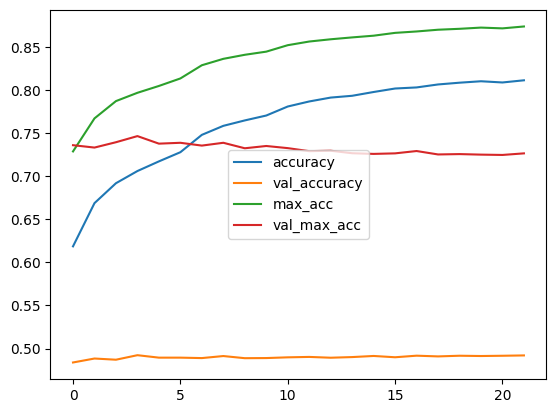

In [7]:
plt.plot(his_up.history['accuracy'], label='accuracy')
plt.plot(his_up.history['val_accuracy'], label='val_accuracy')
plt.plot(his_up.history['max_acc'], label='max_acc')
plt.plot(his_up.history['val_max_acc'], label='val_max_acc')
plt.legend()
plt.show()

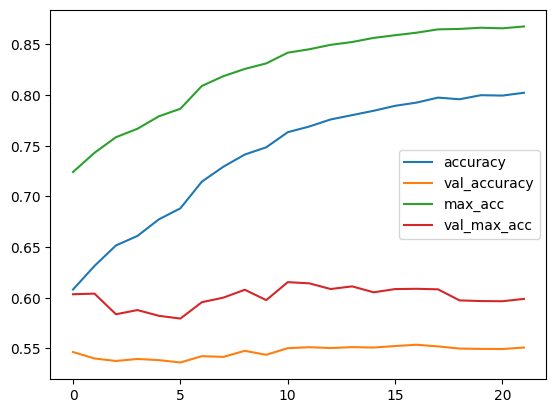

In [10]:
plt.plot(his_down.history['accuracy'], label='accuracy')
plt.plot(his_down.history['val_accuracy'], label='val_accuracy')
plt.plot(his_down.history['max_acc'], label='max_acc')
plt.plot(his_down.history['val_max_acc'], label='val_max_acc')
plt.legend()
plt.show()

In [11]:
model_up.save('./model/model_up_40_ty.h5')
model_down.save('./model/model_down_40_ty.h5')

In [123]:
prediction_data = cf.get_prediction_data(cf.docker_prediction_data_url, train_config_id=7, start="2020-01-01", end=datetime.now().strftime("%Y-%m-%d"), code='QQQ')

In [124]:
X_prediction_scaled = train.to_prediction_scaled(prediction_data, scaler_up)
Y_up_prediction = model_up.predict(X_prediction_scaled)
Y_down_prediction = model_down.predict(X_prediction_scaled)

In [131]:
kline = cf.get_kline_histroy(cf.docker_kline_history_url, code="QQQ", start="2020-07-22", end="2024-01-24")
df = cf.his_to_df(kline)

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


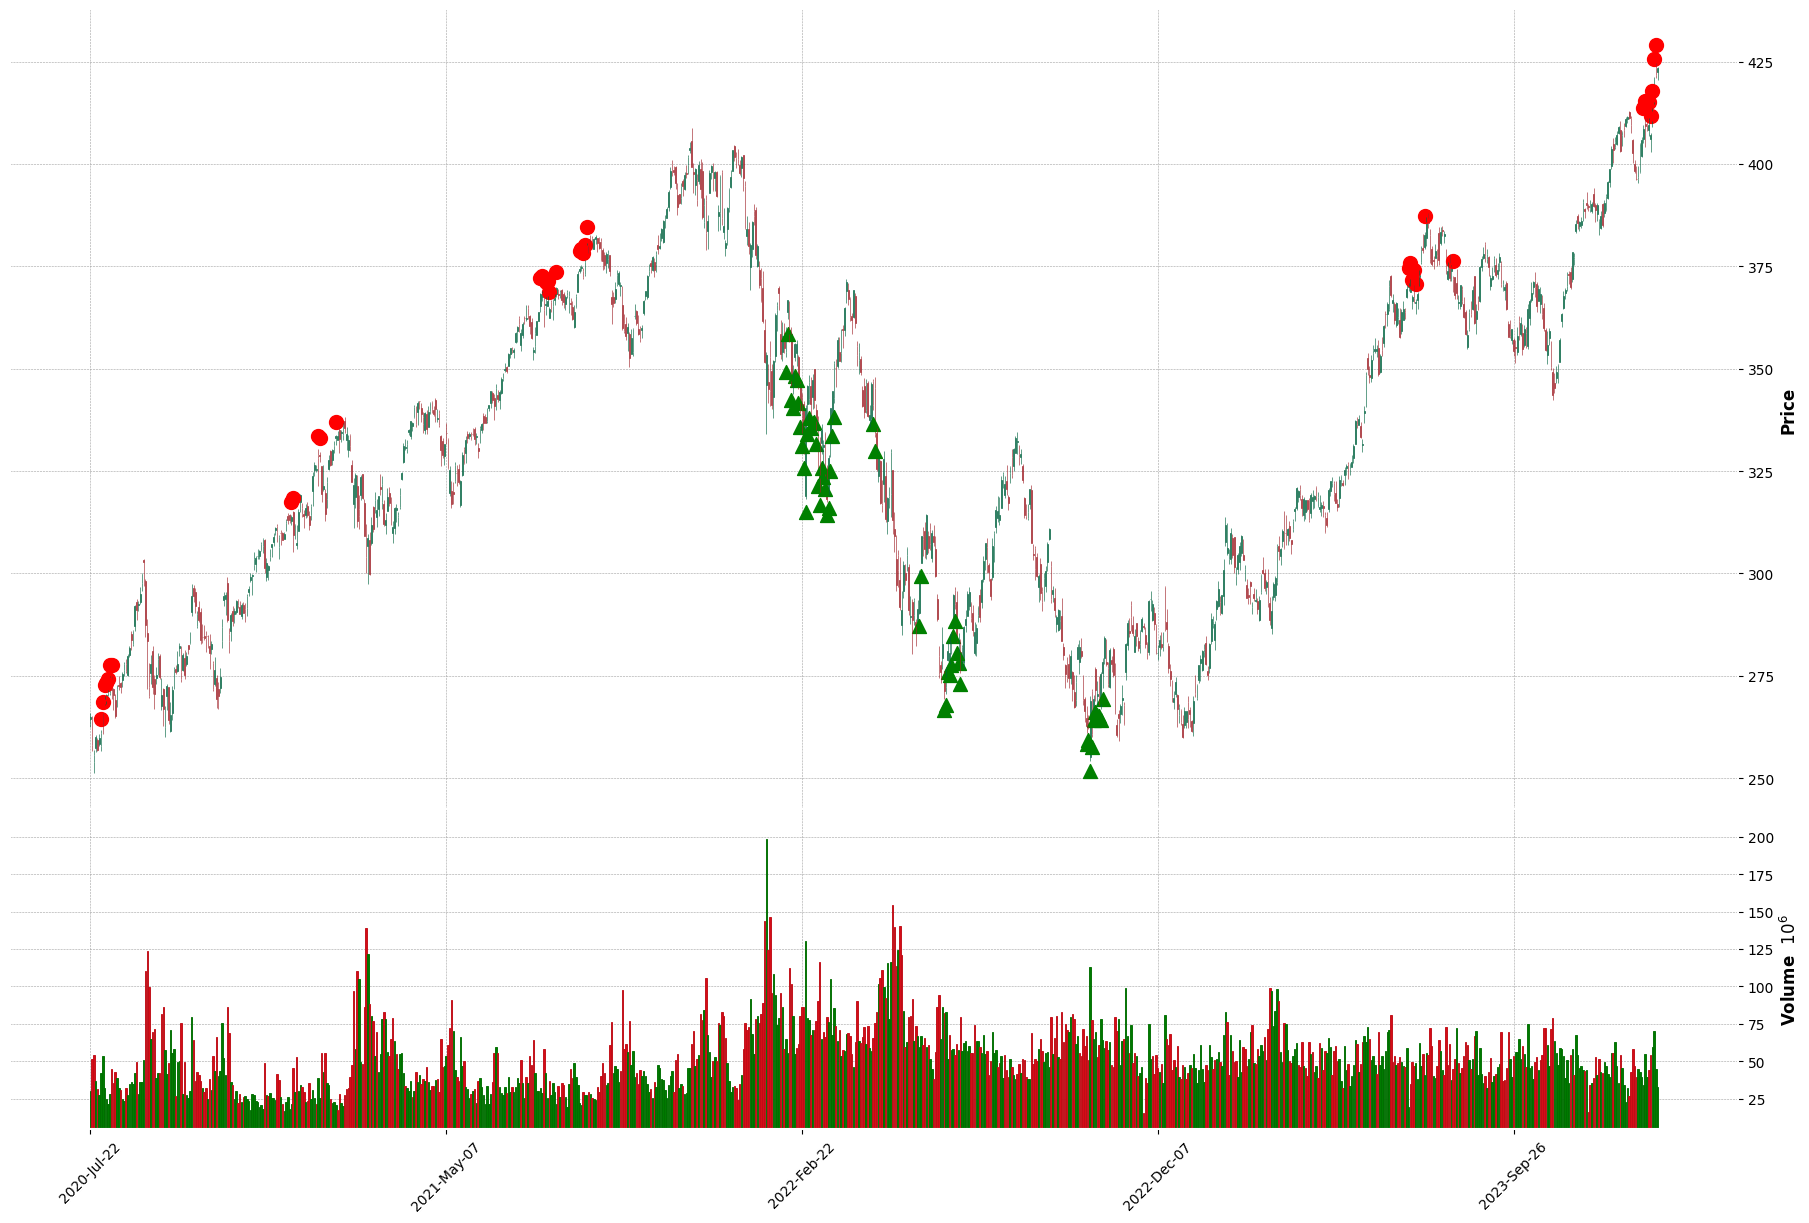

In [133]:
predictions_up_series = pd.Series(Y_up_prediction.flatten(), index=df.index)
buy_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
buy_signals[predictions_up_series > 0.75] = df['low'][predictions_up_series > 0.75] * 0.99
buy_markers = mpf.make_addplot(buy_signals, type='scatter', markersize=100, marker='^', color='g')

predictions_down_series = pd.Series(Y_down_prediction.flatten(), index=df.index)
sell_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
sell_signals[predictions_down_series > 0.75] = df['high'][predictions_down_series > 0.75] * 1.01
sell_markers = mpf.make_addplot(sell_signals, type='scatter', markersize=100, marker='o', color='r')

mpf.plot(df, type='candle', style='charles', addplot=[buy_markers, sell_markers], volume=True, figsize=(24, 16))

In [129]:
len(df)

881

In [130]:
len(Y_down_prediction)

882